In [98]:
from utils import sort_csv_for_channel, make_datasets, get_data_from_csv
from analysis_functions import g2, gaussian
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import numpy


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
channels_files_sorted=sort_csv_for_channel(r"Quantum-Imaging\HBT_data")

In [57]:
dataset_dict=make_datasets(channels_files_sorted)

Quantum-Imaging\HBT_data\-15_Ch1.csv
Quantum-Imaging\HBT_data\-14_Ch1.csv
Quantum-Imaging\HBT_data\-13_Ch1.csv
Quantum-Imaging\HBT_data\-12_Ch1.csv
Quantum-Imaging\HBT_data\-11_Ch1.csv
Quantum-Imaging\HBT_data\-10_Ch1.csv
Quantum-Imaging\HBT_data\-9_Ch1.csv
Quantum-Imaging\HBT_data\-8_Ch1.csv
Quantum-Imaging\HBT_data\-7_Ch1.csv
Quantum-Imaging\HBT_data\-6_Ch1.csv
Quantum-Imaging\HBT_data\-5_Ch1.csv
Quantum-Imaging\HBT_data\-4_Ch1.csv
Quantum-Imaging\HBT_data\-3_Ch1.csv
Quantum-Imaging\HBT_data\-2_Ch1.csv
Quantum-Imaging\HBT_data\-1_Ch1.csv
Quantum-Imaging\HBT_data\0_Ch1.csv
Quantum-Imaging\HBT_data\+1_Ch1.csv
Quantum-Imaging\HBT_data\+2_Ch1.csv
Quantum-Imaging\HBT_data\+3_Ch1.csv
Quantum-Imaging\HBT_data\+4_Ch1.csv
Quantum-Imaging\HBT_data\+5_Ch1.csv
Quantum-Imaging\HBT_data\+6_Ch1.csv
Quantum-Imaging\HBT_data\+7_Ch1.csv
Quantum-Imaging\HBT_data\+8_Ch1.csv
Quantum-Imaging\HBT_data\+9_Ch1.csv
Quantum-Imaging\HBT_data\+10_Ch1.csv
Quantum-Imaging\HBT_data\+11_Ch1.csv
Quantum-Imaging\HBT_d

In [88]:
dataset_dict['Ch1'].shape

(31, 50000)

In [91]:
#compute g2
g2_meas = g2(dataset_dict, normalize=False) 
g2_norm = g2(dataset_dict, normalize=True)

In [105]:
# measure range
x_min = -15
x_max = 15

# real range
a = -3  # mm
b = 3   # mm

# rescaling
g2_norm.index = ((g2_norm.index - x_min) / (x_max - x_min)) * (b - a) + a

In [106]:
g2_norm

-3.0    1.084352
-2.8    1.093444
-2.6    1.102758
-2.4    1.108520
-2.2    1.112209
-2.0    1.126152
-1.8    1.143111
-1.6    1.137620
-1.4    1.156292
-1.2    1.177012
-1.0    1.186252
-0.8    1.196967
-0.6    1.196967
-0.4    1.201505
-0.2    1.196967
 0.0    1.196967
 0.2    1.209243
 0.4    1.208528
 0.6    1.203343
 0.8    1.194809
 1.0    1.193860
 1.2    1.178951
 1.4    1.160465
 1.6    1.154306
 1.8    1.161234
 2.0    1.152562
 2.2    1.141032
 2.4    1.129198
 2.6    1.116310
 2.8    1.103666
 3.0    1.095068
dtype: float64

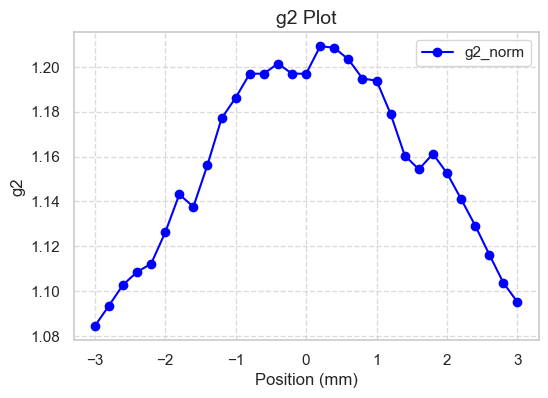

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(g2_norm, label='g2_norm', color='blue', linestyle='-', marker='o')
plt.xlabel('Position (mm)', fontsize=12)
plt.ylabel('g2', fontsize=12)
plt.title('g2 Plot', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
#range in mm (-3,3) dx=200micron
#--diaframma < speckle size (nel nostro caso era 1mm)
#la misura è un po di merda perche non ci sono le code



In [115]:
#gaussian fit
parameters, covariance = curve_fit(gaussian, g2_norm.index, g2_norm.values) 

In [116]:
parameters

array([1.19884507, 0.13398897, 6.55776384])

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\annid\AppData\Local\Temp\ipykernel_7748\1811475474.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes,
C:\Users\annid\AppData\Local\Temp\ipykernel_7748\1811475474.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes,


Text(0.05, 0.95, '$\\mu=0.13$\n$\\sigma=6.56$\nFWHM=15.44')

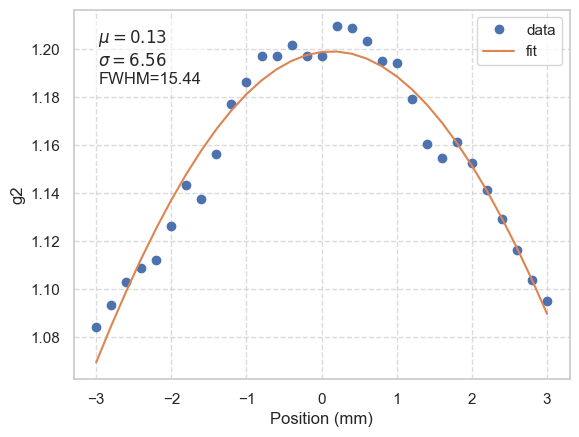

In [126]:
fit_A = parameters[0] 
fit_mu = parameters[1] 
fit_sigma = parameters[2]
x = g2_norm.index
fwhm = 2 * np.sqrt(2 * np.log(2)) * fit_sigma


fit_g2 = gaussian(x, fit_A, fit_mu, fit_sigma) 
plt.plot(x, g2_norm, 'o', label='data') 
plt.plot(x, fit_g2, '-', label='fit') 
# x_domain = np.linspace(-7,7,140)
# plt.plot(x_domain, gaussian(x_domain, fit_A, fit_mu, fit_sigma), '--', label='fit_large_domain')
plt.xlabel('Position (mm)')
plt.ylabel('g2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\annid\AppData\Local\Temp\ipykernel_7748\3163552468.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes,
C:\Users\annid\AppData\Local\Temp\ipykernel_7748\3163552468.py:8: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes,


Text(0.05, 0.95, '$\\mu=0.13$\n$\\sigma=6.56$\nFWHM=15.44')

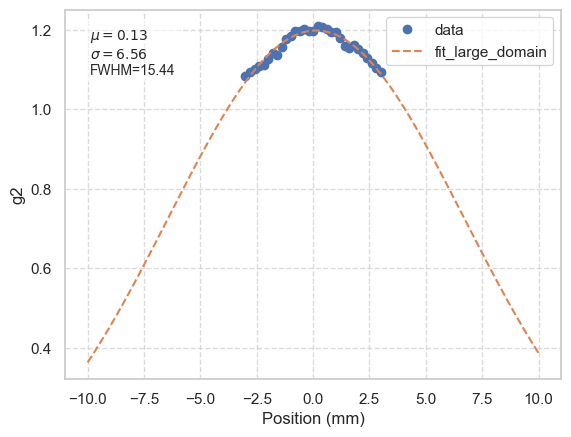

In [128]:
plt.plot(x, g2_norm, 'o', label='data') 
x_domain = np.linspace(-10,10,1000)
plt.plot(x_domain, gaussian(x_domain, fit_A, fit_mu, fit_sigma), '--', label='fit_large_domain')
plt.xlabel('Position (mm)')
plt.ylabel('g2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

In [122]:
errors = np.sqrt(np.diag(covariance))
print("Errori standard dei parametri:")
print(errors)

Errori standard dei parametri:
[0.00243077 0.03462546 0.13936582]
